In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from agents import EGreedy, EGreedySoftmax
from bandit_testbed import TestBed

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<H3> 1. Define the agents with arguments for instantiation </H3>

In [3]:
agents = { # Left empty here since for 
    # each figure I have defined different sets of agents
}

<H3> 2. Run the agents on the testbed </H3>

In [9]:
def measure_performance_on_testbed(agents, n_arms, n_plays, n_games):
    """
    :parma agents: A dictionary with a description and (Class, Arguments) for each agent
    :return A dictionary with { label : [ average_reward_stat, optimal_performance_stat]}
    :rtype: dict
    """
    output = {}
    for desc, agent in agents.items():
        
        # Create the testbed
        testbed = TestBed(n_arms = n_arms, n_plays = n_plays, \
                          n_games = n_games, agent_cls = agent["class"],\
                          cls_args = agent["args"])
        
        # Run all the games
        testbed.run_all_games()
        
        # Stack performance metrics across the n_games
        average_reward = np.stack([game["average_reward"] \
                                   for game in testbed._games])
        prob_optimal_action = np.stack([game["prob_optimal_action"] \
                                        for game in testbed._games])
        
        average_optimal_reward = np.mean([game["optimal_reward"] \
                                          for game in testbed._games])
        
        # Average performance metrics across n_games
        average_reward_stat = np.mean(average_reward, axis=0)
        prob_optimal_action_stat = np.mean(prob_optimal_action, axis=0)
        
        output[desc] = [average_reward_stat, \
                        prob_optimal_action_stat, \
                        average_optimal_reward]
    return output

<H2> Figure 2.1 </H2>

In [15]:
# Step 1
agents = {
    "greedy : e = 0.01": {"class": EGreedy, "args": {"e": 0.01}},
    "greedy : e = 0.1": {"class": EGreedy, "args": {"e": 0.1}},
    "greedy : e = 0.0": {"class": EGreedy, "args": {"e": 0.0}}
}

# Step 2
output = measure_performance_on_testbed(agents, n_arms = 10, \
                                   n_plays = 1000, n_games = 100)

<b> Plot </b>

Optimal reward for greedy : e = 0.01 is 1.6272460921298175
Optimal reward for greedy : e = 0.0 is 1.5644456762461394
Optimal reward for greedy : e = 0.1 is 1.5691597463085725


/Users/shashank/.virtualenvs/openai/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


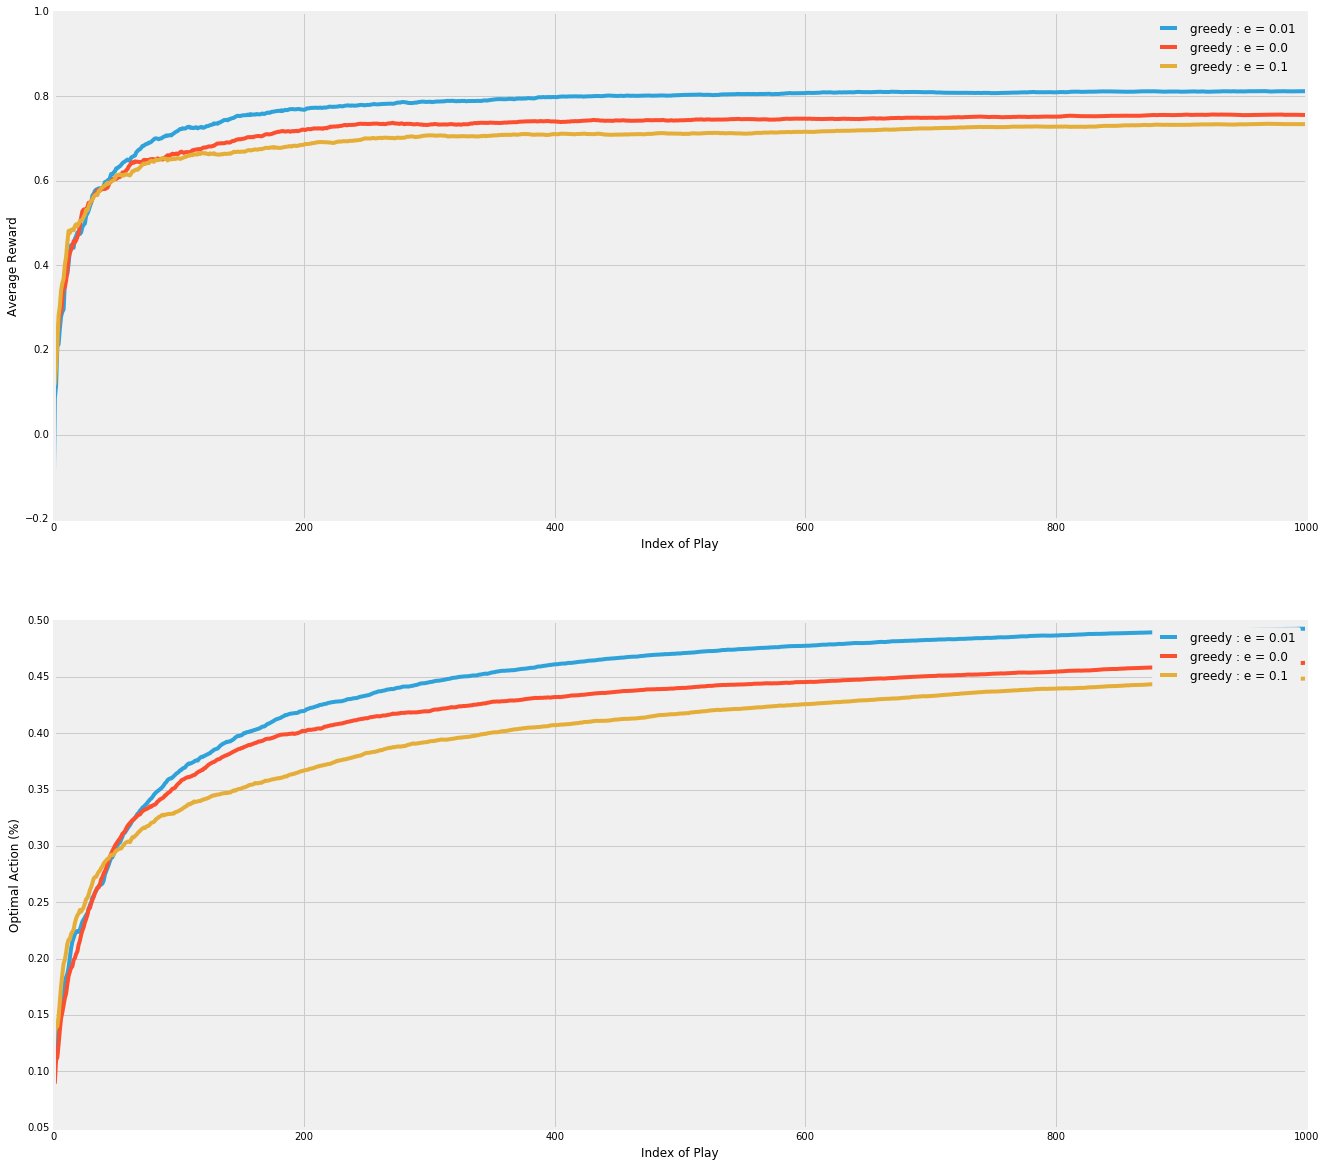

In [16]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    average_optimal_reward = stat[2]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    
    print("Optimal reward for {} is {}".format(desc, average_optimal_reward))

ax1.legend()
ax2.legend()
fig.show()